In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
class_name = 'Attribution-Noncommercial-Share Alike 3.0 United States'
# Load dataset.
tracks = pd.read_csv('data/fma_metadata/tracks_reduced_dataset.csv')
features_to_drop = ['Unnamed: 0']
tracks.drop(features_to_drop, inplace=True, axis=1)

tracks.shape

(99404, 16)

In [3]:
attributes = [col for col in tracks.columns if col != class_name]
X = tracks[attributes].values
y = tracks[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
#different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
           "inv-scaling with nesterovs momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-.'}]

constant learning-rate
training set score and loss: 0.822, 36124725948.235443


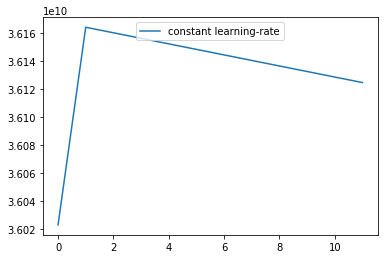

constant with momentum
training set score and loss: 0.822, 3572107758080.424316


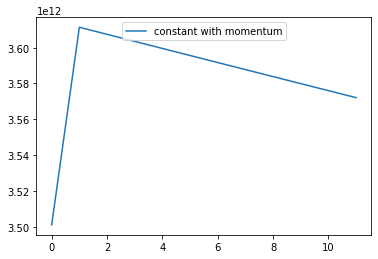

inv-scaling with nesterovs momentum
training set score and loss: 0.822, 13043972747704.214844


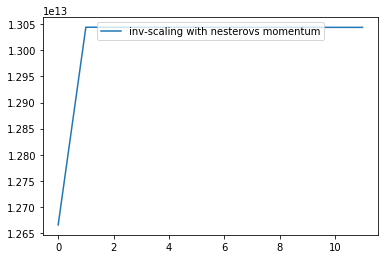

adam
training set score and loss: 0.822, 0.467875


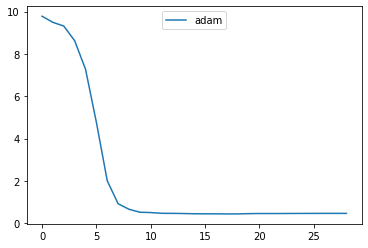

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings
for label, param in zip(labels, params):
    print(label)
    clf = MLPClassifier(random_state=0, max_iter=200, **param)

    # some parameter combinations will not converge as can be seen on the
    # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        clf.fit(X, y)

    print("training set score and loss: %.3f, %f" % (clf.score(X, y), clf.loss_))
    plt.plot(clf.loss_curve_, label=label)
    plt.legend(loc="upper center")
    plt.show()

training: constant learning-rate
Training set score: 0.822150
Training set loss: 36124725948.235443
training: constant with momentum
Training set score: 0.822150
Training set loss: 3572107758080.424316
training: inv-scaling with nesterovs momentum
Training set score: 0.822150
Training set loss: 13043972747704.214844
training: adam
Training set score: 0.822271
Training set loss: 0.467875


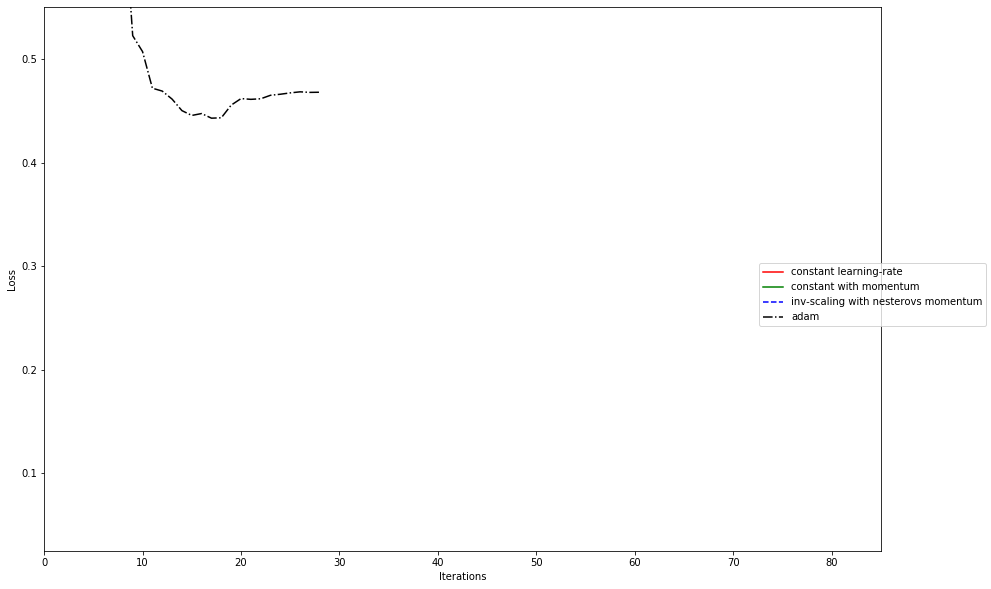

In [8]:
# da migliorare
import warnings
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
        

fig, axes = plt.subplots(1, 1, figsize=(15, 10))      
mlps=[]   
for label, param, args in zip(labels, params,plot_args):
    print("training: %s" % label)
    mlp = MLPClassifier(random_state=0,
                           max_iter=200, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
        mlp.fit(X, y)

    mlps.append(mlp)
    print("Training set score: %f" % mlp.score(X, y))
    print("Training set loss: %f" % mlp.loss_)
    
for mlp, label, args in zip(mlps, labels, plot_args):
    axes.plot(mlp.loss_curve_, label=label, **args)
        
        
        
axes.set_ylabel("Loss")
axes.set_xlabel("Iterations")
axes.set_xlim(0,85)
axes.set_ylim(0.025,0.55)
fig.legend(axes.get_lines(), labels, loc=7)
plt.show()

training: constant learning-rate
Training set score: 0.822150
Training set loss: 36124725948.235443
training: constant with momentum
Training set score: 0.822150
Training set loss: 3572107758080.424316
training: inv-scaling with nesterovs momentum
Training set score: 0.822150
Training set loss: 13043972747704.214844
training: adam
Training set score: 0.822271
Training set loss: 0.467875


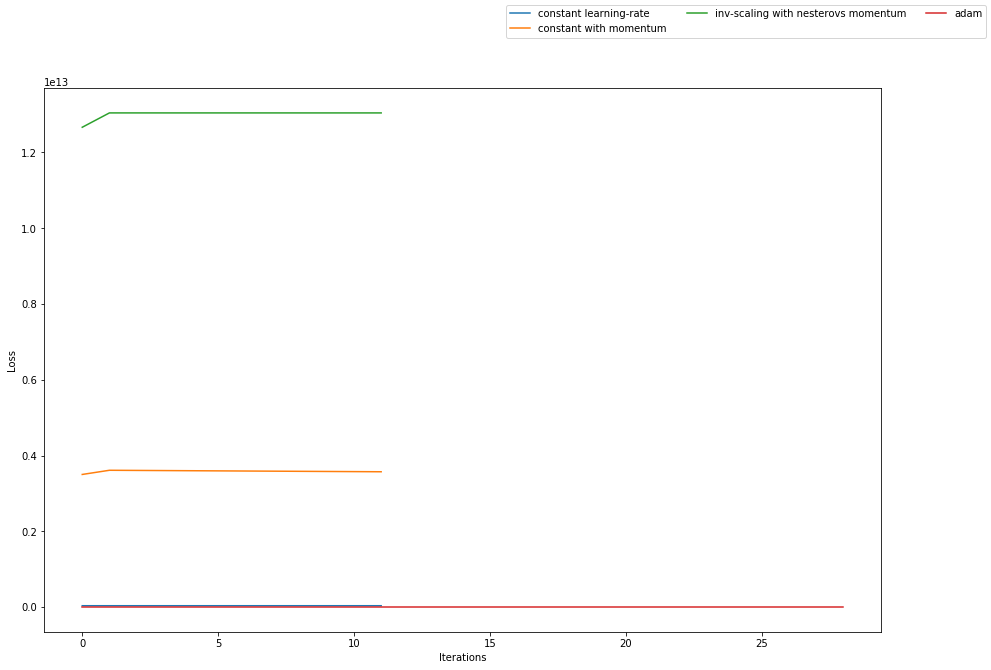

In [9]:
# da migliorare
import warnings
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
        

fig, axes = plt.subplots(1, 1, figsize=(15, 10))      
mlps=[]   
for label, param in zip(labels, params):
    print("training: %s" % label)
    mlp = MLPClassifier(random_state=0,
                           max_iter=200, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
        mlp.fit(X, y)

    mlps.append(mlp)
    print("Training set score: %f" % mlp.score(X, y))
    print("Training set loss: %f" % mlp.loss_)
    
for mlp, label, args in zip(mlps, labels, plot_args):
    axes.plot(mlp.loss_curve_, label=label)
        
        
        
axes.set_ylabel("Loss")
axes.set_xlabel("Iterations")
fig.legend(axes.get_lines(), labels, ncol=3, loc=1)
plt.show()

training: constant learning-rate
Training set score: 0.822150
Training set loss: 36124725948.235443
training: constant with momentum
Training set score: 0.822150
Training set loss: 3572107758080.424316
training: inv-scaling with nesterovs momentum
Training set score: 0.822150
Training set loss: 13043972747704.214844
training: adam
Training set score: 0.822271
Training set loss: 0.467875


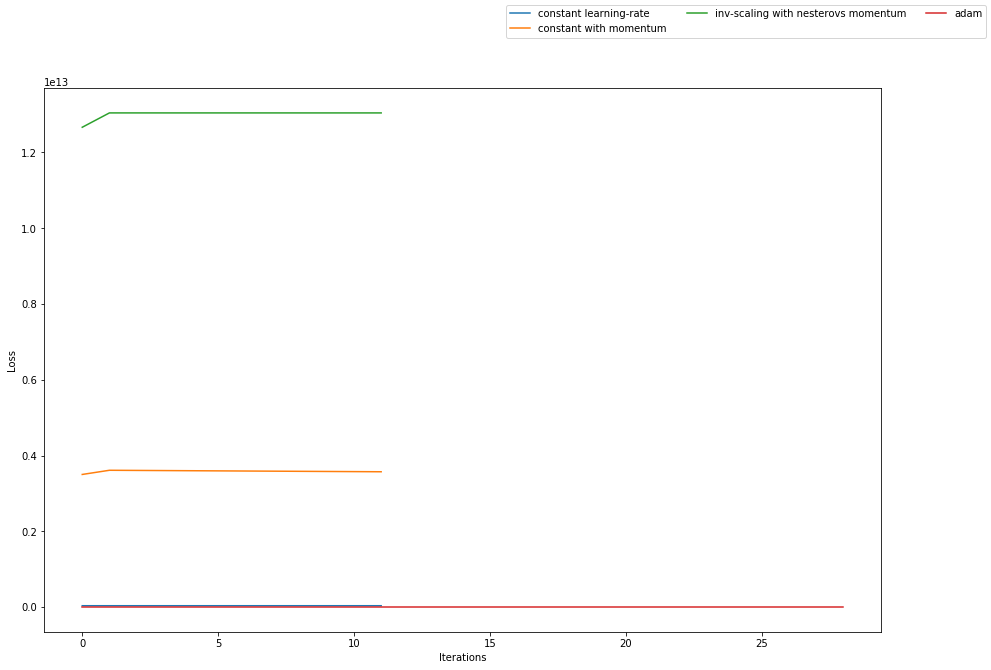

In [10]:
import warnings
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
        
fig, axes = plt.subplots(1, 1, figsize=(15, 10))      
mlps=[]   
for label, param in zip(labels, params):
    print("training: %s" % label)
    mlp = MLPClassifier(random_state=0,
                           max_iter=200, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
        mlp.fit(X, y)

    mlps.append(mlp)
    print("Training set score: %f" % mlp.score(X, y))
    print("Training set loss: %f" % mlp.loss_)
    
for mlp, label, args in zip(mlps, labels, plot_args):
    axes.plot(mlp.loss_curve_, label=label)
        
        
        
axes.set_ylabel("Loss")
axes.set_xlabel("Iterations")
fig.legend(axes.get_lines(), labels, ncol=3, loc=1)
plt.show()

Accuracy 0.8221447253705318
F1-score [0.90239234 0.        ]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     24518
           1       0.00      0.00      0.00      5304

    accuracy                           0.82     29822
   macro avg       0.41      0.50      0.45     29822
weighted avg       0.68      0.82      0.74     29822

Training loss 0.42006231769250524


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation loss 0.42198121865865246


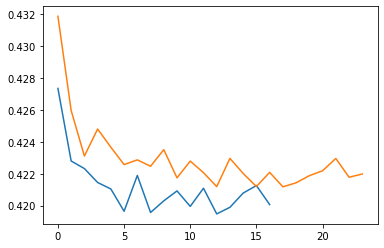

In [11]:
clf = MLPClassifier(random_state=0,solver= 'adam', learning_rate= 'constant',activation='logistic', momentum= .9, hidden_layer_sizes=(3),
           nesterovs_momentum= True, learning_rate_init= 0.2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_log_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
plt.plot(clf.loss_curve_)
print('Training loss '+str(clf.loss_))
clf.fit(X_test, y_test)
print('Validation loss '+str(clf.loss_))
plt.plot(clf.loss_curve_)
plt.show()

In [12]:
clf = MLPClassifier(random_state=0,solver= 'adam', learning_rate= 'invscaling',activation='logistic', momentum= .9, hidden_layer_sizes=(3),
           nesterovs_momentum= True, learning_rate_init= 0.2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_log_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print('Training loss '+str(clf.loss_))
clf.fit(X_train, y_train)
print('Validation loss '+str(clf.loss_))

Accuracy 0.8221447253705318
F1-score [0.90239234 0.        ]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     24518
           1       0.00      0.00      0.00      5304

    accuracy                           0.82     29822
   macro avg       0.41      0.50      0.45     29822
weighted avg       0.68      0.82      0.74     29822

Training loss 0.42006231769250524


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation loss 0.42006231769250524


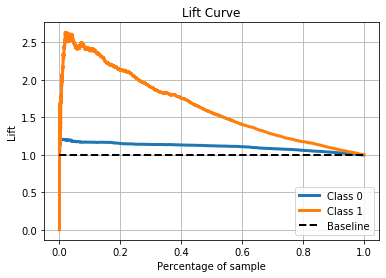

In [13]:
from scikitplot.metrics import plot_lift_curve
plot_lift_curve(y_test, y_score)
plt.show()

In [14]:
clf = MLPClassifier(random_state=0,solver= 'sgd', learning_rate= 'adaptive', activation='logistic', momentum= .9, hidden_layer_sizes=(3),
           nesterovs_momentum= True, learning_rate_init= 0.2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_log_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print('Training loss '+str(clf.loss_))
clf.fit(X_test, y_test)
print('Validation loss '+str(clf.loss_))

Accuracy 0.8220441284957414
F1-score [0.90029122 0.17323571]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     24518
           1       0.50      0.10      0.17      5304

    accuracy                           0.82     29822
   macro avg       0.67      0.54      0.54     29822
weighted avg       0.77      0.82      0.77     29822

Training loss 0.41034347379605585
Validation loss 0.41491474713785037


In [15]:
clf = MLPClassifier(hidden_layer_sizes=(7, 5, 3), alpha=0.1, learning_rate='invscaling', 
                    activation='tanh', early_stopping=False, momentum=0.9, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = y_pred
y_score1 = clf.predict_log_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print('Training loss ' + str(clf.loss_))
clf.fit(X_train, y_train)
print('Validation loss '+ str(clf.loss_))

Accuracy 0.8344510763865602
F1-score [0.90563658 0.32600683]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     24518
           1       0.59      0.23      0.33      5304

    accuracy                           0.83     29822
   macro avg       0.72      0.60      0.62     29822
weighted avg       0.81      0.83      0.80     29822

Training loss 0.39722891371469715
Validation loss 0.39722891371469715


**KERAS DEEP NEURAL NETWORKS**

In [16]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [17]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(7, input_dim=n_feature, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [18]:
model1 = build_model()

history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10).history

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 69582 samples, validate on 29822 samples
Epoch 1/50
69582/69582 [==============================] - 9s 135us/step - loss: 0.4718 - accuracy: 0.8202 - val_loss: 0.4291 - val_accuracy: 0.8236
Epoch 2/50
69582/69582 [==============================] - 9s 132us/step - loss: 0.4246 - accuracy: 0.8239 - val_loss: 0.4237 - val_accuracy: 0.8240
Epoch 3/50
69582/69582 [==============================] - 9s 133us/step - loss: 0.4195 - accuracy: 0.8250 - val_loss: 0.4174 - val_accuracy: 0.8243
Epoch 4/50
69582/69582 [==============================] - 9s 132us/step - loss: 0.4138 - accuracy: 0.8271 - val_loss: 0.4128 - val_accuracy: 0.8243
Epoch 5/50
69582/69582 [==============================] - 9s 129us/step - loss: 0.4087 - accuracy: 0.8304 - val_loss: 0.4074 - val_accuracy: 0.8290
Epoch 6/50
69582/69582 [==============================] - 9s 127us/step - loss: 0.4054 - accuracy: 0.8321 - val_los

In [19]:
model2 = build_model()

history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=50).history

Train on 69582 samples, validate on 29822 samples
Epoch 1/50
69582/69582 [==============================] - 2s 30us/step - loss: 0.5643 - accuracy: 0.7964 - val_loss: 0.4822 - val_accuracy: 0.8249
Epoch 2/50
69582/69582 [==============================] - 2s 26us/step - loss: 0.4554 - accuracy: 0.8263 - val_loss: 0.4420 - val_accuracy: 0.8253
Epoch 3/50
69582/69582 [==============================] - 2s 26us/step - loss: 0.4327 - accuracy: 0.8270 - val_loss: 0.4285 - val_accuracy: 0.8266
Epoch 4/50
69582/69582 [==============================] - 2s 28us/step - loss: 0.4224 - accuracy: 0.8273 - val_loss: 0.4217 - val_accuracy: 0.8272
Epoch 5/50
69582/69582 [==============================] - 2s 26us/step - loss: 0.4162 - accuracy: 0.8277 - val_loss: 0.4162 - val_accuracy: 0.8261
Epoch 6/50
69582/69582 [==============================] - 2s 26us/step - loss: 0.4120 - accuracy: 0.8265 - val_loss: 0.4118 - val_accuracy: 0.8265
Epoch 7/50
69582/69582 [==============================] - 2s 26us/st

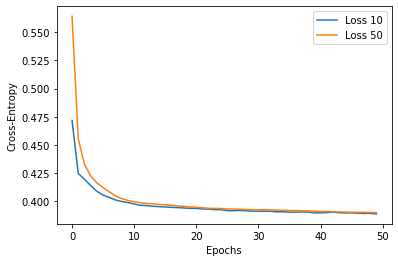

In [20]:
plt.plot(history1['loss'], label='Loss 10')
plt.plot(history2['loss'], label='Loss 50')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [21]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

29822/29822 [==============================] - 0s 12us/step
Loss 0.392721, Accuracy 0.836329
Loss 0.394471, Accuracy 0.835222


In [22]:
y_pred = model1.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8221447253705318
F1-score [0.90239234 0.        ]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     24518
           1       0.00      0.00      0.00      5304

    accuracy                           0.82     29822
   macro avg       0.41      0.50      0.45     29822
weighted avg       0.68      0.82      0.74     29822



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
y_pred = model2.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8221447253705318
F1-score [0.90239234 0.        ]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     24518
           1       0.00      0.00      0.00      5304

    accuracy                           0.82     29822
   macro avg       0.41      0.50      0.45     29822
weighted avg       0.68      0.82      0.74     29822



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


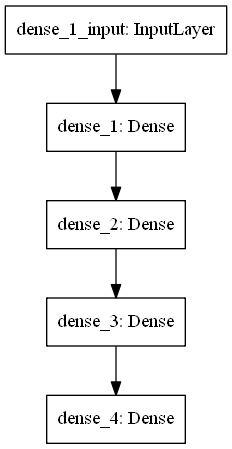

In [24]:
import pydot
from keras.utils import plot_model
plot_model(model1)

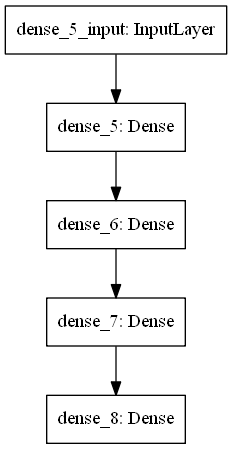

In [25]:
plot_model(model2)

In [26]:
model3 = build_model()

history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10).history

Train on 69582 samples, validate on 29822 samples
Epoch 1/1000
69582/69582 [==============================] - 9s 133us/step - loss: 0.4291 - accuracy: 0.8213 - val_loss: 0.4168 - val_accuracy: 0.8244
Epoch 2/1000
69582/69582 [==============================] - 9s 136us/step - loss: 0.4125 - accuracy: 0.8265 - val_loss: 0.4108 - val_accuracy: 0.8273
Epoch 3/1000
69582/69582 [==============================] - 9s 136us/step - loss: 0.4078 - accuracy: 0.8273 - val_loss: 0.4070 - val_accuracy: 0.8254
Epoch 4/1000
69582/69582 [==============================] - 9s 127us/step - loss: 0.4046 - accuracy: 0.8278 - val_loss: 0.4070 - val_accuracy: 0.8276
Epoch 5/1000
69582/69582 [==============================] - 9s 130us/step - loss: 0.4033 - accuracy: 0.8279 - val_loss: 0.4044 - val_accuracy: 0.8259
Epoch 6/1000
69582/69582 [==============================] - 9s 133us/step - loss: 0.4023 - accuracy: 0.8288 - val_loss: 0.4035 - val_accuracy: 0.8288
Epoch 7/1000
69582/69582 [========================

In [27]:
print('Train: Loss %f, Accuracy %f' % (history1['loss'][49], history1['accuracy'][49]))
print('Val: Loss %f, Accuracy %f' % (history1['val_loss'][49], history1['val_accuracy'][49]))

Train: Loss 0.388669, Accuracy 0.836883
Val: Loss 0.392721, Accuracy 0.836329


In [28]:
print('Train: Loss %f, Accuracy %f' % (history2['loss'][49], history2['accuracy'][49]))
print('Val: Loss %f, Accuracy %f' % (history2['val_loss'][49], history2['val_accuracy'][49]))

Train: Loss 0.389801, Accuracy 0.838838
Val: Loss 0.394471, Accuracy 0.835222


In [29]:
print('Train: Loss %f, Accuracy %f' % (history3['loss'][99], history3['accuracy'][99]))
print('Val: Loss %f, Accuracy %f' % (history3['val_loss'][99], history3['val_accuracy'][99]))

Train: Loss 0.384362, Accuracy 0.837214
Val: Loss 0.393814, Accuracy 0.831333


29822/29822 [==============================] - 0s 15us/step
Loss 0.392721, Accuracy 0.836329
Loss 0.394471, Accuracy 0.835222
Loss 0.390507, Accuracy 0.832707


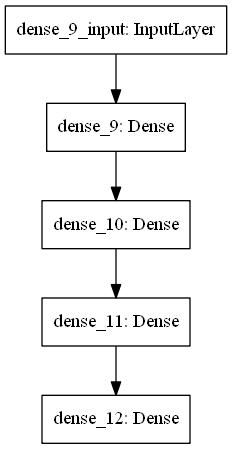

In [30]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
plot_model(model3)

In [31]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)

29822/29822 [==============================] - 0s 16us/step


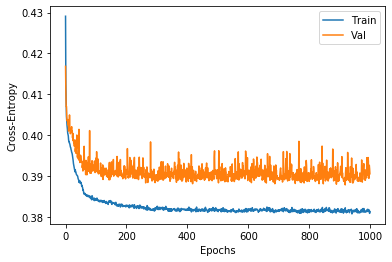

In [32]:
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [33]:
#scores = cross_val_score(model3, X_train, y_train, cv=10)
#print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

#scores = cross_val_score(model3, X_train, y_train, cv=10, scoring='f1_macro')
#print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

In [34]:
from ann_visualizer.visualize import ann_viz;
#Build your model here
ann_viz(model3,view=True, filename="net.gv")

Error: Could not open "net.gv.pdf" for writing : Permission denied


CalledProcessError: Command '['dot.bat', '-Tpdf', '-O', 'net.gv']' returned non-zero exit status 1. [stderr: b'Error: Could not open "net.gv.pdf" for writing : Permission denied\r\n']

**EARLY STOPPING**

In [35]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [38]:
es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model4 = build_model()
history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, 
                      batch_size=10, callbacks=[es,mc]).history

Train on 55665 samples, validate on 13917 samples
Epoch 1/100
55665/55665 [==============================] - 8s 144us/step - loss: 0.4325 - accuracy: 0.8180 - val_loss: 0.4180 - val_accuracy: 0.8205
Epoch 2/100
55665/55665 [==============================] - 8s 140us/step - loss: 0.4126 - accuracy: 0.8225 - val_loss: 0.4113 - val_accuracy: 0.8205
Epoch 3/100
55665/55665 [==============================] - 8s 137us/step - loss: 0.4060 - accuracy: 0.8231 - val_loss: 0.4058 - val_accuracy: 0.8227
Epoch 4/100
55665/55665 [==============================] - 8s 140us/step - loss: 0.4016 - accuracy: 0.8279 - val_loss: 0.4010 - val_accuracy: 0.8265
Epoch 5/100
55665/55665 [==============================] - 8s 139us/step - loss: 0.3975 - accuracy: 0.8309 - val_loss: 0.4001 - val_accuracy: 0.8293
Epoch 6/100
55665/55665 [==============================] - 8s 139us/step - loss: 0.3948 - accuracy: 0.8324 - val_loss: 0.3972 - val_accuracy: 0.8294
Epoch 7/100
55665/55665 [==============================]

In [39]:
test_loss_4, test_acc_4 = model4.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
print('Loss %f, Accuracy %f' % (test_loss_4, test_acc_4))

29822/29822 [==============================] - 0s 16us/step
Loss 0.392721, Accuracy 0.836329
Loss 0.394471, Accuracy 0.835222
Loss 0.390507, Accuracy 0.832707
Loss 0.383576, Accuracy 0.837100


**L2 REGULARIZATION**

In [40]:
from keras.regularizers import l2

def build_L2_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    model.add(Dense(7, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.01)))
    model.add(Dense(5, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(3, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [41]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_loss', save_best_only=True)

L2_model = build_L2_model()
h_L2 = L2_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, 
                    batch_size=10, callbacks=[es,mc]).history

Train on 55665 samples, validate on 13917 samples
Epoch 1/100
55665/55665 [==============================] - 8s 143us/step - loss: 0.4849 - accuracy: 0.8130 - val_loss: 0.4591 - val_accuracy: 0.8205
Epoch 2/100
55665/55665 [==============================] - 8s 136us/step - loss: 0.4571 - accuracy: 0.8225 - val_loss: 0.4583 - val_accuracy: 0.8205
Epoch 3/100
55665/55665 [==============================] - 8s 135us/step - loss: 0.4565 - accuracy: 0.8225 - val_loss: 0.4582 - val_accuracy: 0.8205
Epoch 4/100
55665/55665 [==============================] - 8s 136us/step - loss: 0.4563 - accuracy: 0.8225 - val_loss: 0.4575 - val_accuracy: 0.8205
Epoch 5/100
55665/55665 [==============================] - 8s 139us/step - loss: 0.4561 - accuracy: 0.8225 - val_loss: 0.4575 - val_accuracy: 0.8205
Epoch 6/100
55665/55665 [==============================] - 7s 133us/step - loss: 0.4562 - accuracy: 0.8225 - val_loss: 0.4575 - val_accuracy: 0.8205
Epoch 7/100
55665/55665 [==============================]

In [42]:
from keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(7, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [43]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_loss', save_best_only=True)

DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                              epochs=100, batch_size=10, callbacks=[es,mc]).history

Train on 55665 samples, validate on 13917 samples
Epoch 1/100
55665/55665 [==============================] - 9s 159us/step - loss: 0.4685 - accuracy: 0.8213 - val_loss: 0.4287 - val_accuracy: 0.8205
Epoch 2/100
55665/55665 [==============================] - 9s 159us/step - loss: 0.4400 - accuracy: 0.8225 - val_loss: 0.4261 - val_accuracy: 0.8205
Epoch 3/100
55665/55665 [==============================] - 9s 154us/step - loss: 0.4353 - accuracy: 0.8225 - val_loss: 0.4239 - val_accuracy: 0.8205
Epoch 4/100
55665/55665 [==============================] - 8s 150us/step - loss: 0.4328 - accuracy: 0.8225 - val_loss: 0.4210 - val_accuracy: 0.8205
Epoch 5/100
55665/55665 [==============================] - 8s 145us/step - loss: 0.4312 - accuracy: 0.8225 - val_loss: 0.4200 - val_accuracy: 0.8205
Epoch 6/100
55665/55665 [==============================] - 8s 142us/step - loss: 0.4306 - accuracy: 0.8225 - val_loss: 0.4181 - val_accuracy: 0.8205
Epoch 7/100
55665/55665 [==============================]

In [44]:
# laod best models and test them
from keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

29822/29822 [==============================] - 1s 25us/step


In [45]:
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

Loss 0.383438, Accuracy 0.838039
Loss 0.455967, Accuracy 0.822145
Loss 0.411632, Accuracy 0.822145


**HYPER-PARAMETER TUNING**

In [46]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

In [47]:
def build_model(n_layers=2, h_dim=5, activation='relu', optimizer='adam'):
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    
    model.add(Dense(h_dim, activation=activation, input_shape=(n_feature,)))
    for i in range(n_layers-1):
        model.add(Dense(h_dim, activation=activation))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [48]:
n_layers = [1, 2, 3]
h_dim = [7, 15, 21]
activation = ['relu', 'tanh']
optimizer = ['adagrad', 'adam']
params = dict(optimizer=optimizer, n_layers=n_layers, h_dim=h_dim, activation=activation)

In [49]:
model = KerasRegressor(build_fn=build_model)

rnd = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5, cv=3)
rnd_result = rnd.fit(X, y, epochs=100, batch_size=10, verbose=0)

33134/33134 [==============================] - 4s 118us/step


In [50]:
print("Best: %f using %s" % (-rnd_result.best_score_, rnd_result.best_params_))
means = rnd_result.cv_results_['mean_test_score']
stds = rnd_result.cv_results_['std_test_score']
params = rnd_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (-mean, stdev, param))

Best: 1.953406 using {'optimizer': 'adagrad', 'n_layers': 2, 'h_dim': 21, 'activation': 'tanh'}
1.953406 (1.635962) with: {'optimizer': 'adagrad', 'n_layers': 2, 'h_dim': 21, 'activation': 'tanh'}
2.743145 (1.090736) with: {'optimizer': 'adam', 'n_layers': 3, 'h_dim': 7, 'activation': 'tanh'}
6.288052 (4.849464) with: {'optimizer': 'adagrad', 'n_layers': 1, 'h_dim': 21, 'activation': 'relu'}
8.602755 (4.693917) with: {'optimizer': 'adagrad', 'n_layers': 1, 'h_dim': 7, 'activation': 'relu'}
6.784277 (3.571584) with: {'optimizer': 'adagrad', 'n_layers': 2, 'h_dim': 15, 'activation': 'relu'}


In [51]:
clf = rnd_result.best_estimator_.model

loss, acc = clf.evaluate(X_test, y_test)
print('Loss %f, Accuracy %f' % (loss, acc))

29822/29822 [==============================] - 2s 68us/step
Loss 1.498935, Accuracy 0.616659


In [52]:
historyBest = clf.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=10).history

Train on 55665 samples, validate on 13917 samples
Epoch 1/100
55665/55665 [==============================] - 10s 182us/step - loss: 0.5780 - accuracy: 0.8018 - val_loss: 0.4720 - val_accuracy: 0.8197
Epoch 2/100
55665/55665 [==============================] - 9s 169us/step - loss: 0.4955 - accuracy: 0.8184 - val_loss: 0.4986 - val_accuracy: 0.8145
Epoch 3/100
55665/55665 [==============================] - 10s 176us/step - loss: 0.4835 - accuracy: 0.8207 - val_loss: 0.4735 - val_accuracy: 0.8199
Epoch 4/100
55665/55665 [==============================] - 9s 171us/step - loss: 0.4640 - accuracy: 0.8221 - val_loss: 0.4548 - val_accuracy: 0.8202
Epoch 5/100
55665/55665 [==============================] - 10s 172us/step - loss: 0.4539 - accuracy: 0.8224 - val_loss: 0.4493 - val_accuracy: 0.8201
Epoch 6/100
55665/55665 [==============================] - 9s 162us/step - loss: 0.4513 - accuracy: 0.8225 - val_loss: 0.4481 - val_accuracy: 0.8207
Epoch 7/100
55665/55665 [============================

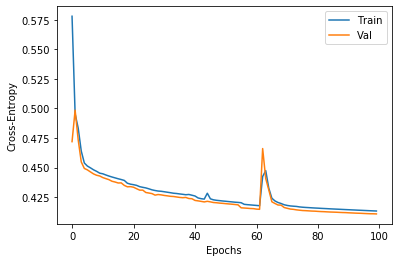

In [53]:
plt.plot(historyBest['loss'], label='Train')
plt.plot(historyBest['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()